## 네트워크에서 비슷한 그룹을 찾기 

### 네트워크에서 커뮤니티 찾기 
- 전체 네트워크에서 비슷한 군집 찾아서 묶을 수 있다. 
- 개별 node를 다른 node들과 얼마나 떨어져 있는지를 vecter값으로 표현할 수 있다. 각 값을 vector로 표현할 수 있으면 벡터간의 거리를 계산해서 가까운 놈은 묶어주고 아니면 안 묶는 식으로 처리하자. 

### cut edge 

- 클러스터링이 쉽게 이루어 지지는 않음 그래서 생각해 볼 수 있는 방법이 betweenness centrality가 높은 edge를 잘라나가다 보면 적절하게 클러스터링이 나뉘지 않을까? 였습니다. 

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

## 테스트 그래프 생성
G = nx.Graph()
G.add_nodes_from([chr(c) for c in range(ord('A'), ord('A')+15)])
# add edge
G.add_edges_from([('A', n) for n in list(G.nodes())[:10]])
G.add_edges_from([('G', n) for n in list(G.nodes())[11:]])
G.add_edges_from([('B', 'J'), ('C', 'J'), ('C', 'H'), ('H', 'E'), ('E', 'D'), ('D', 'I'), 
                  ('I', 'F'), ('B', 'K'), ('K', 'F')])
G.add_edges_from([('O', 'N'), ('N', 'L'), ('M', 'L'), ('O', 'K'), ('K', 'M')])
G.add_edges_from([('A', 'K'), ('G', 'K')])
G.remove_edge('A', 'G'), 
pos = nx.spring_layout(G)
# G.remove_node('K')
# G.remove_nodes_from(['A', 'G'])


In [64]:
G

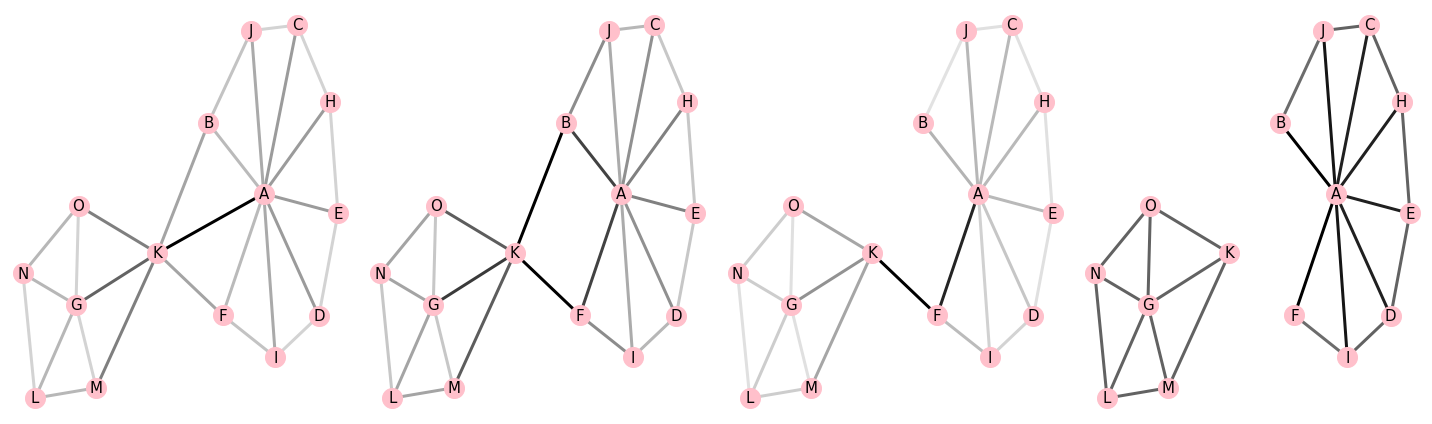

In [65]:
####
f, axes = plt.subplots(1, 4, sharex=True, sharey=True)
f.set_size_inches((20, 6)) 
i=0
while True:
    #ax = axes[i//2][i%2]
    ax = axes[i]
    nx.draw_networkx_nodes(G, pos, node_shape='o', node_size=400, 
                           node_color='pink', ax=ax
                           #node_color=['Red' if n is 'K' else 'pink'  for n in G.nodes()]
                          )
    #edge_color_lst = list(nx.edge_betweenness_centrality(G).values())
    #edge_color_lst = [(ec)/(max(edge_color_lst) - min(edge_color_lst)) for ec in edge_color_lst]
    nx.draw_networkx_edges(G, pos, width = 3, 
                           edge_cmap = plt.cm.binary, ## 그냥 cmap이 아니라 edge_cmap으로 넘겨야 함 
                           edge_color = list(nx.edge_betweenness_centrality(G).values()), 
                           edge_vmin=-0.05, ax=ax
                           #edge_vmin=0, edge_vmax=1.0
                          )
    ## font family에는 font_name이 들어가야 함. 블로그에 정리해둠
    nx.draw_networkx_labels(
            G, pos, font_family='BM JUA_OTF', font_color='black', font_size=15,
            ax=ax
        )
    #plt.axis('off')
    ax.set_axis_off()
    #plt.savefig('../../assets/images/markdown_img/180807_centrality_deg_bet_net.png', dpi=200)
    #plt.show()
    if nx.is_connected(G):
        r_edge = max(list(nx.edge_betweenness_centrality(G).items()), key=lambda x: x[1])[0]
        G.remove_edge(*r_edge)
        i+=1
    else:
        break
plt.tight_layout()
plt.show()

- 위 그림처럼, betweenness centrality가 높은 edge를 자르다보면, 밀집도가 높은 cluster로 잘 나뉘게 됩니다. 
- 이렇게 community를 만드는 방법을 <b>girvan_newman</b>이라고 합니다. 

### finding communities: girvan_newman 사용법

In [66]:
from networkx.algorithms.community import girvan_newman

## girvan_newman은 가장 중요한 edge를 자르는데
## 아무 것도 넘기지 않고 실행하면, edge_betweenness centrality를 사용해서 자르고 
## 그렇지 않을 경우에는 graph를 input으로 받고, edge를 출력해주는 function을 넘겨주어야 함 
## 아래는 아무것도 넘기지 않았을때와 똑같은 의미를 가지는 함수 

def most_valuable_edge(g):
    return max(nx.edge_betweenness_centrality(g).items(), key=lambda x: x[1])[0]

comm = girvan_newman(G, most_valuable_edge=most_valuable_edge)


In [67]:
comm

<generator object girvan_newman at 0x000001D388B7FEB0>

In [68]:

## girvan_newman으로 만든 iterator는 끝까지 가면 모두 1개 크기의 세트로 이루어진 커뮤니티 세트가 나옴 
for i, comms in enumerate(girvan_newman(G)):
    print('community set_{:0>2d}'.format(i))
    print("="*30)
    for i, c in enumerate(comms):
        print("community_{:0>2d}: {}".format(i, c))
    print("="*30)

community set_00
community_00: {'I', 'C', 'E', 'F', 'H', 'D', 'A'}
community_01: {'J', 'B'}
community_02: {'N', 'L', 'K', 'M', 'G', 'O'}
community set_01
community_00: {'E', 'I', 'F', 'D', 'A'}
community_01: {'J', 'B'}
community_02: {'C', 'H'}
community_03: {'N', 'L', 'K', 'M', 'G', 'O'}
community set_02
community_00: {'D', 'A', 'I', 'F'}
community_01: {'J', 'B'}
community_02: {'C', 'H'}
community_03: {'E'}
community_04: {'N', 'L', 'K', 'M', 'G', 'O'}
community set_03
community_00: {'D', 'A', 'I', 'F'}
community_01: {'J', 'B'}
community_02: {'C', 'H'}
community_03: {'E'}
community_04: {'N', 'K', 'G', 'O'}
community_05: {'M', 'L'}
community set_04
community_00: {'A', 'I', 'F'}
community_01: {'J', 'B'}
community_02: {'C', 'H'}
community_03: {'D'}
community_04: {'E'}
community_05: {'N', 'K', 'G', 'O'}
community_06: {'M', 'L'}
community set_05
community_00: {'A', 'I', 'F'}
community_01: {'J', 'B'}
community_02: {'C', 'H'}
community_03: {'D'}
community_04: {'E'}
community_05: {'K', 'G', 'O'

### finding communities with k: asyn_fluidc 사용법 
- k-clustering처럼 그룹의 수만큼 그룹을 만들어 주는 방법을 말합니다. 
- 이하는 매번 k의 값을 2로하고, 큰 그룹을 분할해주는 방식입니다. 

In [69]:
## 테스트 그래프 생성
G = nx.Graph()
G.add_nodes_from([chr(c) for c in range(ord('A'), ord('A')+15)])
# add edge
G.add_edges_from([('A', n) for n in list(G.nodes())[:10]])
G.add_edges_from([('G', n) for n in list(G.nodes())[11:]])
G.add_edges_from([('B', 'J'), ('C', 'J'), ('C', 'H'), ('H', 'E'), ('E', 'D'), ('D', 'I'), 
                  ('I', 'F'), ('B', 'K'), ('K', 'F')])
G.add_edges_from([('O', 'N'), ('N', 'L'), ('M', 'L'), ('O', 'K'), ('K', 'M')])
G.add_edges_from([('A', 'K'), ('G', 'K')])
G.remove_edge('A', 'G'), 
pos = nx.spring_layout(G)
# G.remove_node('K')
# G.remove_nodes_from(['A', 'G'])


In [70]:
# 끊어져 있는 graph에서는 돌아가지 않음. 
if nx.is_connected(G): 
    for k in range(1, 5):
        for i, community in enumerate(nx.algorithms.community.asyn_fluidc(G, k=k)):
            print("community_{:0>2d}: {}".format(i, community))
        print("="*40)
else:
    print("G가 not connected이면 실행안됨")

community_00: {'N', 'L', 'J', 'K', 'E', 'C', 'I', 'F', 'M', 'G', 'O', 'B', 'H', 'D', 'A'}
community_00: {'J', 'I', 'C', 'E', 'B', 'H', 'D', 'A'}
community_01: {'N', 'L', 'K', 'F', 'M', 'G', 'O'}
community_00: {'J', 'E', 'C', 'B', 'H', 'A'}
community_01: {'D', 'I', 'F'}
community_02: {'N', 'L', 'K', 'M', 'G', 'O'}
community_00: {'F', 'K', 'O'}
community_01: {'D', 'I', 'E', 'H'}
community_02: {'N', 'L', 'M', 'G'}
community_03: {'A', 'J', 'B', 'C'}


### finding communities: label propagation

In [71]:
## 이 method의 경우는 girvan_newman과 다르게 단 한가지 방법에 대해서만 리턴함. 
## label propagation은 노드에 랜덤하게 라벨을 칠하고, 그 노드의 이웃한 노드들에서 가장 많이 발견되는 
## 라벨로 현재 노드를 칠해주는 것을 말함 

## directional graph의 경우 쓰는 method 
from networkx.algorithms.community.label_propagation import asyn_lpa_communities
## undirectional graph의 경우 쓰는 method 
from networkx.algorithms.community.label_propagation import label_propagation_communities

for i, comm in enumerate(asyn_lpa_communities(G)):
    print("community_{:0>2d}: {}".format(i, comm))
print("="*20)
for i, comm in enumerate(label_propagation_communities(G)):
    print("community_{:0>2d}: {}".format(i, comm))

community_00: {'J', 'E', 'C', 'F', 'I', 'B', 'H', 'D', 'A'}
community_01: {'N', 'L', 'K', 'M', 'G', 'O'}
community_00: {'N', 'L', 'J', 'K', 'E', 'C', 'F', 'I', 'M', 'B', 'G', 'H', 'O', 'D', 'A'}


### validation partition
- 그룹화가 얼마나 잘 되었는지를 coverage, performance 로 측정 한다고 합니다. 
- The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph. 
- The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges. 

coverage, performance 이해가 좀 안되서, 원문을 확인해 봄. <br>
https://arxiv.org/pdf/0906.0612.pdf

An example of quality function is the <b>performance P</b>, which counts the number of correctly “interpreted” pairs of vertices, i. e. <u>two vertices belonging to the same community and connected by an edge, or two vertices belonging to different communities and not connected by an edge.</u> The definition of performance, for a partition <br><br>
P, is <br>
P(P) = |{(i, j) ∈ E, Ci = Cj}| + |{(i, j) ∈/ E, Ci 6= Cj} / {n(n − 1)/2}
<br><br>
By definition, 0 ≤ P(P) ≤ 1. Another example is <b>coverage</b>, i. e. the ratio of the number of intra-community
edges by the total number of edges: by definition, <u>an ideal cluster structure, where the clusters are disconnected from each other</u>, yields a coverage of 1, as all edges of the graph fall within clusters.

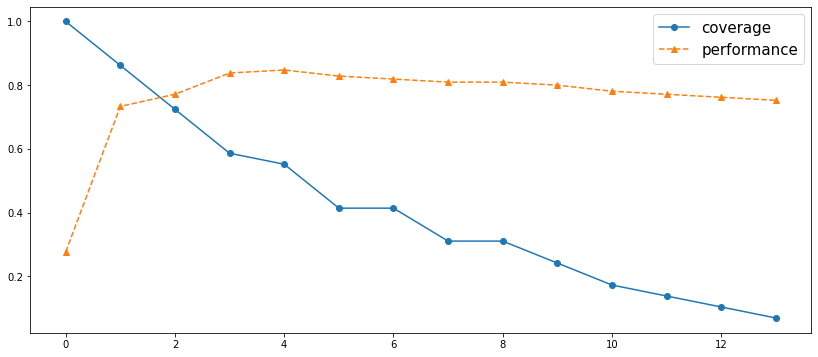

In [73]:
from networkx.algorithms.community import coverage, performance

coverage_lst, performance_lst = [], [] 
for k in range(1, len(G.nodes())):
    communities = list(nx.algorithms.community.asyn_fluidc(G, k=k))
    coverage_lst.append( coverage(G, communities) )
    performance_lst.append( performance(G, communities) )
## 그림에서 보는 것처럼 performance가 충분히 높아지고 변화의 폭이 줄어들고 
## coverage가 충분히 큰 정도에서 멈추면 될듯함. 
## 따라서 적당한 k는 아마도 2-3 정도 
plt.figure(figsize=(14, 6))
plt.plot(coverage_lst, 'o-', label='coverage')
plt.plot(performance_lst, '^--', label='performance')
plt.legend(fontsize=15)
plt.show()

---

오늘 한 내용은, 100% 이해는 힘들었음, 전에 네트워크 해본 적 있어서, 바로 예제로 넘어 왔는데,, 기초 적인 부분도 한 번 더 봐야 할 거 같음 